In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo('AAPL',api_key = 'a28e7f7590e04e9216a01e68434704f018ea81e3')

<ipython-input-3-332e8fdf71d7>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key = 'a28e7f7590e04e9216a01e68434704f018ea81e3')


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd 

In [6]:
df = pd.read_csv('AAPL.csv')

In [47]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-10-18 00:00:00+00:00,216.02,219.740,213.00,217.86,32581315,51.718611,52.609238,50.995575,52.159136,130325260,0.0,1.0
1,AAPL,2018-10-19 00:00:00+00:00,219.31,221.260,217.43,218.06,33078726,52.506289,52.973150,52.056187,52.207019,132314904,0.0,1.0
2,AAPL,2018-10-22 00:00:00+00:00,220.65,223.360,218.94,219.79,28792082,52.827106,53.475923,52.417705,52.621209,115168328,0.0,1.0
3,AAPL,2018-10-23 00:00:00+00:00,222.73,223.250,214.70,215.83,38767846,53.325091,53.449587,51.402582,51.673122,155071384,0.0,1.0
4,AAPL,2018-10-24 00:00:00+00:00,215.09,224.230,214.54,222.60,40925163,51.495954,53.684215,51.364275,53.293967,163700652,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,AAPL,2023-10-10 00:00:00+00:00,178.39,179.720,177.95,178.10,43698019,178.390000,179.720000,177.950000,178.100000,43698019,0.0,1.0
1252,AAPL,2023-10-11 00:00:00+00:00,179.80,179.850,177.60,178.20,47551098,179.800000,179.850000,177.600000,178.200000,47551098,0.0,1.0
1253,AAPL,2023-10-12 00:00:00+00:00,180.71,182.340,179.04,180.07,56743119,180.710000,182.340000,179.040000,180.070000,56743119,0.0,1.0
1254,AAPL,2023-10-13 00:00:00+00:00,178.85,181.930,178.14,181.42,51456082,178.850000,181.930000,178.140000,181.420000,51456082,0.0,1.0


In [7]:
df2 = df.reset_index()['close']

In [8]:
df2[1228:]

1228 177.56
1229 178.18
1230 179.36
1231 176.30
1232 174.21
1233 175.74
1234 175.01
1235 177.97
1236 179.07
1237 175.49
1238 173.93
1239 174.79
1240 176.08
1241 171.96
1242 170.43
1243 170.69
1244 171.21
1245 173.75
1246 172.40
1247 173.66
1248 174.91
1249 177.49
1250 178.99
1251 178.39
1252 179.80
1253 180.71
1254 178.85
1255 178.72
Name: close, dtype: float64

In [9]:
df1 = df.reset_index()['close']

In [10]:
df1.shape

(1256,)

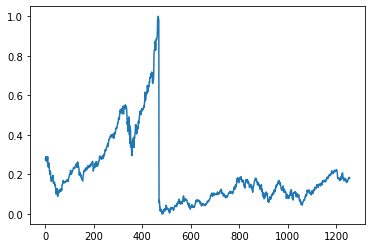

In [46]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.savefig("1.png")

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
df1.shape

(1256, 1)

In [15]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [16]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i: (i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
training_size, test_size

(816, 440)

In [18]:
len(train_data), len(test_data)

(816, 440)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train)

[[0.27346274 0.28170319 0.28505949 ... 0.18552286 0.18752661 0.1925861 ]
 [0.28170319 0.28505949 0.29026925 ... 0.18752661 0.1925861  0.19857232]
 [0.28505949 0.29026925 0.27113338 ... 0.1925861  0.19857232 0.20333125]
 ...
 [0.0989856  0.09983719 0.10356919 ... 0.17051972 0.16320601 0.16363181]
 [0.09983719 0.10356919 0.10737633 ... 0.16320601 0.16363181 0.1636819 ]
 [0.10356919 0.10737633 0.10715091 ... 0.16363181 0.1636819  0.17092048]]


In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 268ms/step - loss: 0.0458 - val_loss: 0.0016
Epoch 2/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0168 - val_loss: 0.0042
Epoch 3/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0117 - val_loss: 6.8673e-04
Epoch 4/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0096 - val_loss: 3.8397e-04
Epoch 5/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0091 - val_loss: 9.2530e-04
Epoch 6/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0079 - val_loss: 3.2166e-04
Epoch 7/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0073 - val_loss: 3.2552e-04
Epoch 8/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0069 - val_loss: 2.6029e-04
Epoch 9/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0060 - val_loss: 2.6470e-04
Epoch 10/100
12/12 [==============================] - 2s 150ms/

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.10.1'

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 2s 210ms/step


In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.4246203849078

In [31]:
math.sqrt(mean_squared_error(y_test,test_predict))

162.50936624397954

In [49]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df1)-1, :] = test_predict

#plot baseline and prediction

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
plt.savefig("2.png")

<Figure size 432x288 with 0 Axes>

In [33]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [34]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [37]:
#demonstrate prediction for next 10 days

from numpy import array

lst_output = []
n_steps = 100
i = 0

while (i<30):

    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(yhat.tolist())
        i = i+1
    
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)

0 day input [0.17179712 0.1764809  0.17635567 0.183469   0.18562304 0.18219161
 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413
 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646
 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419
 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902 0.20348153
 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645
 0.21613024 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567
 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793
 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082  0.18189105
 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405 0.17630557
 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293 0.20240451
 0.20295554 0.20693801 0.20753914 0.19053225 0.17713212 0.17868503
 0.18164058 0.17397621 0.16874139 0.17257358 0.17074515 0.17815905
 0.18091421 0.1719474  0.16804008 0.17019411 0.17342517 0.16310582
 0.15927364 0.15992486 0.1612273  0.16758923 0.1642

In [38]:
day_new = np.arange(1,99)
day_pred = np.arange(99,129)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

1256

In [41]:
df3 = df1.tolist()
df3.extend(lst_output)

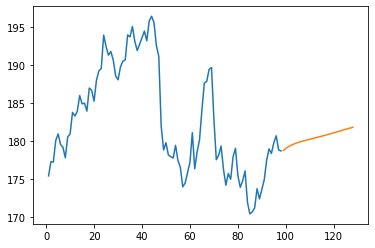

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig("3.png")

In [43]:
(day_new[:98]).shape

(98,)

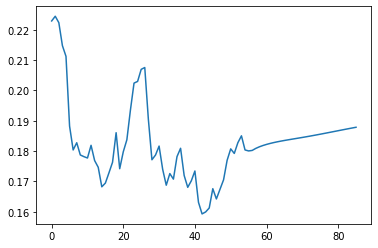

In [44]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])